# PREDICTION USING UNSUPERVISED MACHINE LEARNING

Author: Surajit Middya

**Task: To predict the optimum No. of clusters and represent it visually from the "Iris" Data set.**

## Importing all libraries required in this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

## Load the iris dataset

In [2]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.shape

(150, 6)

In [4]:
#checking whether any data is missing from the above 6 columns.
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
features = iris_df.drop(['Id'], axis = 1)
features.shape

(150, 5)

In [8]:
features.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## converting the categorical data of Species column into numerical data

In [10]:
features_mapped= features.copy()
features_mapped['Species']=features_mapped['Species'].map({'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2})
features_mapped

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [11]:
from sklearn.cluster import KMeans

In [12]:
my_cluster_model = KMeans(n_clusters=2)  # Initially Randomly Selecting number of cluster = 2

In [13]:
labels1 = my_cluster_model.fit_predict(features_mapped)

In [14]:
iris_df['cluster'] = my_cluster_model.labels_
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

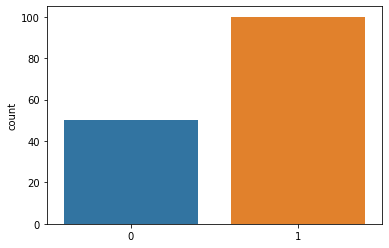

In [15]:
sns.countplot(labels1)

In [16]:
iris_df.groupby('cluster').count()['Id']

cluster
0     50
1    100
Name: Id, dtype: int64

In [17]:
my_cluster_model.cluster_centers_

array([[5.006, 3.418, 1.464, 0.244, 0.   ],
       [6.262, 2.872, 4.906, 1.676, 1.5  ]])

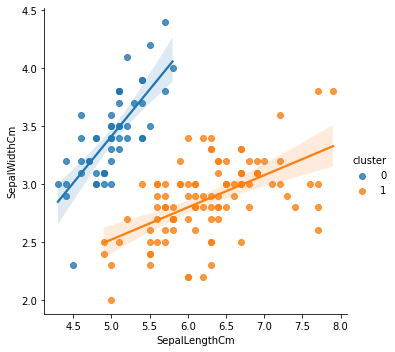

In [18]:
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',data=iris_df,hue='cluster');  #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

## Finding the optimum number of clusters for K-Means clustering (Elbow Method)

In [19]:
wcss=[]      #within a cluster sum of square (c-xi)2         
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1) #Start with same random data point as centroid ,random_state=1
    kmeans.fit_predict(features_mapped)
    wcss.append(kmeans.inertia_)  #the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [20]:
wcss

[780.8244,
 180.03640000000001,
 87.31002785114046,
 66.97905140650855,
 50.44702078227296,
 42.765768576029444,
 35.37883252818036,
 31.119762661251794,
 29.285263454530046,
 26.920901503759392]

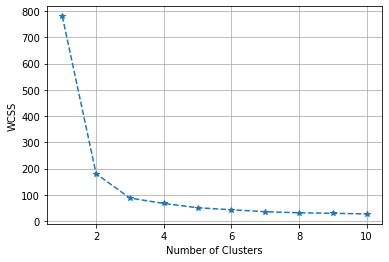

In [21]:
plt.plot(range(1,11),wcss,"*--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we can see that 3 is the optimum no. of cluster for the above data set.

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

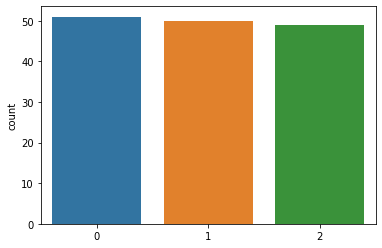

In [22]:
my_cluster_model = KMeans(n_clusters=3)
labels2=my_cluster_model.fit_predict(features_mapped)
iris_df['cluster'] = my_cluster_model.labels_
sns.countplot(labels2)

In [23]:
iris_df.groupby('cluster').count()['Id']

cluster
0    51
1    50
2    49
Name: Id, dtype: int64

## visualization through scatter plot

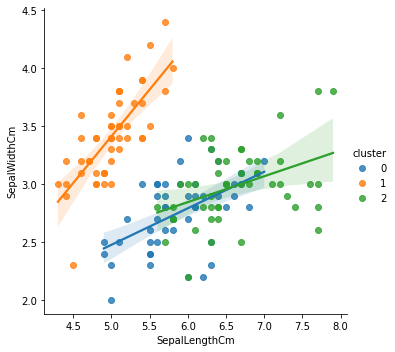

In [24]:
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm', data=iris_df,hue='cluster');
plt.show()

This concludes the K-Means Clustering.

**Thank You**